In [13]:
with open('APIKEY.txt') as f:
    api_key = f.readline()
    f.close

In [14]:
import gmaps
import requests, json

gmaps.configure(api_key=api_key)

In [15]:
import numpy as np
import pandas as pd

url = url = "https://maps.googleapis.com/maps/api/place/textsearch/json?"

def get_lat_lng(p):

    if pd.isna(p):
        return None
    
    else:
        try:
            r = requests.get(url + 'query=' + str(p) + '&key=' + api_key)
            
            x = r.json()
            
            y = x['results']

            lat = y[0]['geometry']['location']['lat']
            lng = y[0]['geometry']['location']['lng']
            
            return (lat, lng)

        except:
            return None

In [16]:
df = pd.read_csv('finalcomments.csv')
df.head()

,Unnamed: 0,user,nationality,current_location,comment_date,comment,sentiment_score
0,0,Danny Ascencio,Argentina,"Dallas, Texas",2021-10-22,"In the fifa website, says November 21- Decembe...",0.0000
1,1,mazinio,NaN,NaN,2021-10-23,Where can u aee that. Can u please share the l...,0.5423
2,2,Paul Calixte,NaN,"Miami, FL",2021-10-23,"Hi everyone,\n\nWith the incoming proliferatio...",0.6114
3,3,Danny Ascencio,Argentina,"Dallas, Texas",2021-10-25,"I spoke too soon, it says it will be available...",0.4199
4,4,Danny Ascencio,Argentina,"Dallas, Texas",2021-10-25,https://www.fifa.com/tournaments/mens/worldcup...,0.0000


In [17]:
df['lat_lng'] = df['current_location'].map(lambda x: get_lat_lng(x))

In [ ]:
df['lat'] = df['lat_lng'].map(lambda x: x[0] if x else None)
df['lng'] = df['lat_lng'].map(lambda x: x[1] if x else None)

In [ ]:
import reverse_geocoder as rg

def rev_geocode(x):
    if x == None:
        return None
    else:
        try:
            return rg.search(x)[0]['cc']
        except:
            return None

In [ ]:
df['Country'] = df['lat_lng'].map(lambda x: rev_geocode(x))

In [ ]:
df.to_csv('comments_with_country_code.csv')

In [1]:
import pandas as pd
import numpy as np
df = pd.read_csv('comments_with_country_code.csv')
df = df.rename(columns={'Unnamed: 0': 'ID'})
df_count = df.groupby('Country')[['lat', 'lng', 'ID', 'sentiment_score']].agg({'lat': np.mean, 'lng': np.mean, 'ID': 'count', 'sentiment_score': np.mean}).reset_index()

In [3]:
df_count.sort_values(by='ID', ascending=False).reset_index(drop=True)

,Country,lat,lng,ID,sentiment_score
0,US,35.046412,-105.061135,4148,0.228763
1,GB,53.465409,-3.960601,637,0.114949
2,QA,25.285447,51.531040,526,0.335800
3,IE,53.339955,-6.275346,442,0.326290
4,AU,-33.153017,142.579014,426,0.257580
5,IT,41.871940,12.567380,380,0.106815
6,CA,46.964375,-97.406582,347,0.207583
7,DE,50.582009,10.517513,156,0.155189
8,AR,-34.603684,-58.381559,129,0.208312
9,LB,33.893791,35.501777,126,0.232721


Text(105.59722222222221, 0.5, 'Latitude')

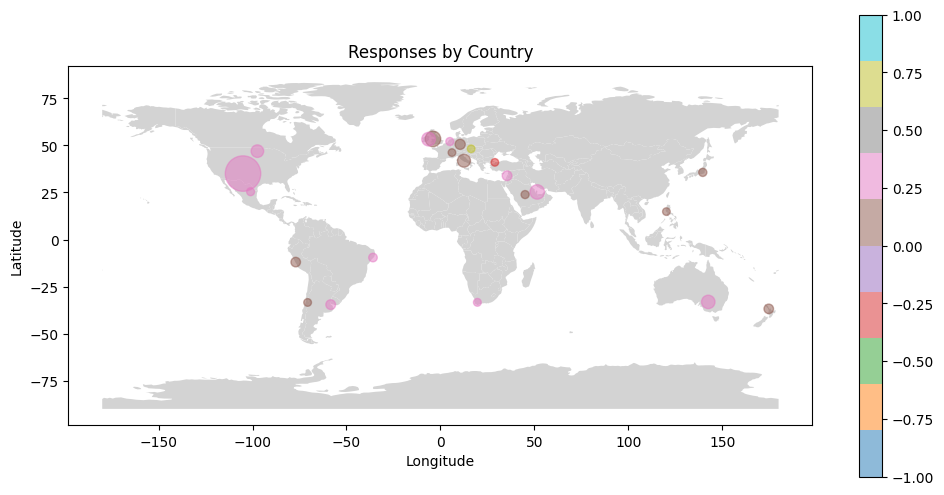

In [7]:
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib

# From GeoPandas, our world map data
worldmap = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))

# Creating axes and plotting world map
fig, ax = plt.subplots(figsize=(12, 6))
worldmap.plot(color="lightgrey", ax=ax)

# Plotting our latitudes and longitudes
plt.scatter(df_count['lng'], df_count['lat'], c = df_count['sentiment_score'], norm=matplotlib.colors.Normalize(vmin=-1, vmax=1), s = 0.15*df_count['ID'] + 30, alpha=0.5)
plt.set_cmap('tab10')
plt.colorbar()
plt.title('Responses by Country')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

Text(105.59722222222221, 0.5, 'Latitude')

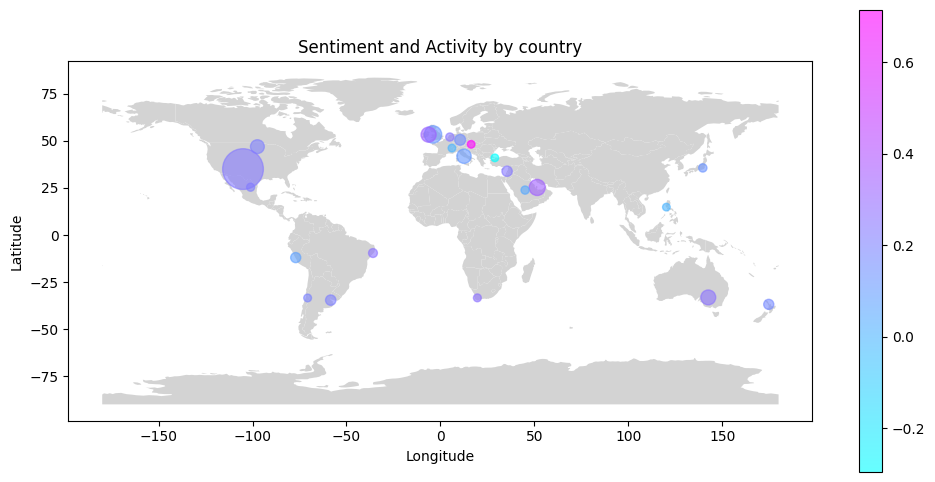

In [19]:
# From GeoPandas, our world map data
worldmap = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))

# Creating axes and plotting world map
fig, ax = plt.subplots(figsize=(12, 6))
worldmap.plot(color="lightgrey", ax=ax)

# Plotting our latitudes and longitudes
plt.scatter(df_count['lng'], df_count['lat'], c = df_count['sentiment_score'], norm=matplotlib.colors.Normalize(vmin=min(df_count['sentiment_score']), vmax=max(df_count['sentiment_score'])), s = 0.2*df_count['ID'] + 30, alpha=0.6)
plt.set_cmap('cool')
plt.colorbar()
plt.title('Sentiment and Activity by country')
plt.xlabel('Longitude')
plt.ylabel('Latitude')